In [1]:
%matplotlib inline
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize 
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load gameweek json file locally
with open('GameWeek1-2021.json') as f:
    data = json.load(f)
data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [3]:
# fantasy premier league API
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url).json()
response.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [23]:
data['element_stats']

[{'label': 'Minutes played', 'name': 'minutes'},
 {'label': 'Goals scored', 'name': 'goals_scored'},
 {'label': 'Assists', 'name': 'assists'},
 {'label': 'Clean sheets', 'name': 'clean_sheets'},
 {'label': 'Goals conceded', 'name': 'goals_conceded'},
 {'label': 'Own goals', 'name': 'own_goals'},
 {'label': 'Penalties saved', 'name': 'penalties_saved'},
 {'label': 'Penalties missed', 'name': 'penalties_missed'},
 {'label': 'Yellow cards', 'name': 'yellow_cards'},
 {'label': 'Red cards', 'name': 'red_cards'},
 {'label': 'Saves', 'name': 'saves'},
 {'label': 'Bonus', 'name': 'bonus'},
 {'label': 'Bonus Points System', 'name': 'bps'},
 {'label': 'Influence', 'name': 'influence'},
 {'label': 'Creativity', 'name': 'creativity'},
 {'label': 'Threat', 'name': 'threat'},
 {'label': 'ICT Index', 'name': 'ict_index'}]

In [19]:
# Data on players in the leage
players = data['elements']
players[3]

{'chance_of_playing_next_round': None,
 'chance_of_playing_this_round': None,
 'code': 54694,
 'cost_change_event': 0,
 'cost_change_event_fall': 0,
 'cost_change_start': 0,
 'cost_change_start_fall': 0,
 'dreamteam_count': 0,
 'element_type': 3,
 'ep_next': '4.5',
 'ep_this': '5.0',
 'event_points': 7,
 'first_name': 'Pierre-Emerick',
 'form': '7.0',
 'id': 4,
 'in_dreamteam': False,
 'news': '',
 'news_added': None,
 'now_cost': 120,
 'photo': '54694.jpg',
 'points_per_game': '7.0',
 'second_name': 'Aubameyang',
 'selected_by_percent': '46.4',
 'special': False,
 'squad_number': None,
 'status': 'a',
 'team': 1,
 'team_code': 3,
 'total_points': 7,
 'transfers_in': 79396,
 'transfers_in_event': 79396,
 'transfers_out': 158490,
 'transfers_out_event': 158490,
 'value_form': '0.6',
 'value_season': '0.6',
 'web_name': 'Aubameyang',
 'minutes': 90,
 'goals_scored': 1,
 'assists': 0,
 'clean_sheets': 1,
 'goals_conceded': 0,
 'own_goals': 0,
 'penalties_saved': 0,
 'penalties_missed': 0,

In [5]:
# Data on teams
teams = data['teams']
teams

[{'code': 3,
  'draw': 0,
  'form': None,
  'id': 1,
  'loss': 0,
  'name': 'Arsenal',
  'played': 0,
  'points': 0,
  'position': 0,
  'short_name': 'ARS',
  'strength': 4,
  'team_division': None,
  'unavailable': False,
  'win': 0,
  'strength_overall_home': 1190,
  'strength_overall_away': 1270,
  'strength_attack_home': 1190,
  'strength_attack_away': 1200,
  'strength_defence_home': 1160,
  'strength_defence_away': 1270,
  'pulse_id': 1},
 {'code': 7,
  'draw': 0,
  'form': None,
  'id': 2,
  'loss': 0,
  'name': 'Aston Villa',
  'played': 0,
  'points': 0,
  'position': 0,
  'short_name': 'AVL',
  'strength': 2,
  'team_division': None,
  'unavailable': False,
  'win': 0,
  'strength_overall_home': 1050,
  'strength_overall_away': 1080,
  'strength_attack_home': 1010,
  'strength_attack_away': 1080,
  'strength_defence_home': 1000,
  'strength_defence_away': 1110,
  'pulse_id': 2},
 {'code': 36,
  'draw': 0,
  'form': None,
  'id': 3,
  'loss': 0,
  'name': 'Brighton',
  'played

In [6]:
# players signed up to play 
managers = data['total_players']
managers

6316729

In [7]:
# position ID's and information for the 4 types of positions:  goalkeepers, defenders, midfielders, and forwards
positions = data['element_types']
positions

[{'id': 1,
  'plural_name': 'Goalkeepers',
  'plural_name_short': 'GKP',
  'singular_name': 'Goalkeeper',
  'singular_name_short': 'GKP',
  'squad_select': 2,
  'squad_min_play': 1,
  'squad_max_play': 1,
  'ui_shirt_specific': True,
  'sub_positions_locked': [12],
  'element_count': 55},
 {'id': 2,
  'plural_name': 'Defenders',
  'plural_name_short': 'DEF',
  'singular_name': 'Defender',
  'singular_name_short': 'DEF',
  'squad_select': 5,
  'squad_min_play': 3,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 194},
 {'id': 3,
  'plural_name': 'Midfielders',
  'plural_name_short': 'MID',
  'singular_name': 'Midfielder',
  'singular_name_short': 'MID',
  'squad_select': 5,
  'squad_min_play': 2,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 216},
 {'id': 4,
  'plural_name': 'Forwards',
  'plural_name_short': 'FWD',
  'singular_name': 'Forward',
  'singular_name_short': 'FWD',
  

In [8]:
# Create the features for the machine learning model.
# first taking in data needed from players and changing all NaN to 0
players_df = pd.DataFrame(players)
players_df = players_df.fillna(0)
players_df.keys()

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [9]:
# Extract the features wanted for forwards from the players data
forw_feats_df = players_df[[
#     'chance_of_playing_next_round', 
#             'chance_of_playing_this_round', 
#             'code',
            'cost_change_event', 
#             'cost_change_event_fall', 
#             'cost_change_start',
#             'cost_change_start_fall', 
#             'dreamteam_count', 
            'element_type', 
            'ep_next',
            'ep_this', 
            'event_points', 
#             'first_name', 
            'form', 
#             'id', 
#             'in_dreamteam',
#             'news', 
#             'news_added', 
            'now_cost', 
#             'photo', 
            'points_per_game',
#             'second_name', 
            'selected_by_percent', 
#             'special', 
#             'squad_number',
#             'status', 
            'team', 
#             'team_code', 
            'total_points', 
#             'transfers_in',
            'transfers_in_event', 
#             'transfers_out', 
            'transfers_out_event',
            'value_form', 
#             'value_season', 
#             'web_name', 
            'minutes', 
            'goals_scored',
            'assists', 
#             'clean_sheets', 
#             'goals_conceded', 
#             'own_goals',
#             'penalties_saved', 
            'penalties_missed', 
            'yellow_cards', 
            'red_cards',
#             'saves', 
#             'bonus', 
            'bps', 
            'influence', 
            'creativity', 
            'threat',
            'ict_index', 
#             'influence_rank', 
#             'influence_rank_type', 
#             'creativity_rank',
#             'creativity_rank_type', 
#             'threat_rank', 
#             'threat_rank_type',
#             'ict_index_rank', 
#             'ict_index_rank_type',
#             'corners_and_indirect_freekicks_order',
#             'corners_and_indirect_freekicks_text', 
#             'direct_freekicks_order',
#             'direct_freekicks_text', 
#             'penalties_order', 
#             'penalties_text'
                           ]]

# forw_feats_df['']


forw_feats_df = forw_feats_df.loc[forw_feats_df['element_type'] == 4]
forw_feats_df = forw_feats_df.reset_index()
forw_feats_df = forw_feats_df.loc[forw_feats_df['minutes'] != 0]
forw_feats_df = forw_feats_df.drop(columns = ['index','event_points','form','points_per_game'])
forw_feats_df

,cost_change_event,element_type,ep_next,ep_this,now_cost,selected_by_percent,team,total_points,transfers_in_event,transfers_out_event,value_form,minutes,goals_scored,assists,penalties_missed,yellow_cards,red_cards,bps,influence,creativity,threat,ict_index
0,0,4,3.5,4.0,85,4.8,1,7,56025,19419,0.8,86,1,0,0,0,0,29,38.6,12.7,48.0,9.9
1,0,4,2.3,2.8,60,1.5,1,1,2492,24743,0.2,3,0,0,0,0,0,3,0.0,0.0,0.0,0.0
9,0,4,1.6,1.1,65,1.6,3,2,4887,11404,0.3,90,0,0,0,0,0,1,0.0,1.0,8.0,0.7
10,0,4,1.0,0.5,55,0.5,3,1,3313,4061,0.2,45,0,0,0,0,0,-3,1.2,0.3,32.0,3.4
16,0,4,2.3,4.5,95,43.5,5,5,50572,313957,0.5,90,0,1,0,0,0,10,4.8,11.7,79.0,9.6
21,0,4,1.3,1.8,60,6.1,6,2,15937,51280,0.3,90,0,0,0,0,0,-7,9.2,0.8,19.0,2.9
23,0,4,2.8,1.8,70,10.9,7,8,236392,39741,1.1,88,1,0,0,0,0,34,38.4,13.7,34.0,8.6
24,0,4,3.3,2.3,80,10.6,7,2,73973,56142,0.2,90,0,0,0,0,0,17,26.2,13.8,67.0,10.7
25,0,4,2.3,1.3,60,0.5,7,1,2288,4358,0.2,1,0,0,0,0,0,2,0.0,0.0,4.0,0.4
26,0,4,1.5,0.5,55,0.1,8,1,1072,1733,0.2,15,0,0,0,0,0,4,0.0,0.4,2.0,0.2


In [10]:
# find total points that week
week_pts = forw_feats_df['total_points']
week_pts

0      7
1      1
9      2
10     1
16     5
21     2
23     8
24     2
25     1
26     1
27     1
28    13
30     7
31     1
32     1
39     2
41     1
43     8
44     2
45     1
46     1
48     1
49     2
50     2
52     2
53     1
54     1
57     2
58     1
61     8
Name: total_points, dtype: int64

In [11]:
X = forw_feats_df.drop(columns = 'total_points')
y = week_pts.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9999193426577027
Testing Score: 0.8883894572979771


Text(0.5, 1.0, 'Residual Plot')

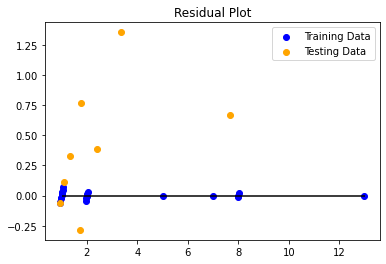

In [12]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [13]:
print(model.predict(X_train))
model.coef_

[[ 0.94195554]
 [ 7.99382968]
 [ 0.945476  ]
 [ 1.01780419]
 [ 1.00297585]
 [ 5.        ]
 [ 7.        ]
 [12.99746668]
 [ 1.98194194]
 [ 1.01248738]
 [ 1.9984098 ]
 [ 2.01048033]
 [ 1.04469204]
 [ 0.98219581]
 [ 8.02246926]
 [ 1.95447446]
 [ 0.97767433]
 [ 7.9887677 ]
 [ 1.99984522]
 [ 1.02674925]
 [ 1.06986969]
 [ 2.03043484]]


array([[-7.16351783e-01, -2.79054733e-11, -1.46680793e-01,
         2.41435112e-02,  1.09119948e-02,  4.86156636e-02,
        -2.32094502e-02,  3.79962884e-07, -7.44535418e-06,
         1.29559055e+00,  7.98553970e-03,  3.17293552e+00,
         1.50935787e+00, -8.88178420e-16, -1.15779268e+00,
        -4.44089210e-16,  1.99930268e-02, -3.41413825e-02,
        -4.73422085e-02, -3.91062767e-02,  5.03596095e-01]])

In [14]:
print(y_train)

[[ 1]
 [ 8]
 [ 1]
 [ 1]
 [ 1]
 [ 5]
 [ 7]
 [13]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 8]
 [ 2]
 [ 1]
 [ 8]
 [ 2]
 [ 1]
 [ 1]
 [ 2]]


In [15]:
# features to gather total goals, their team 

TypeError: predict() missing 1 required positional argument: 'X'